In [50]:
import pandas as pd
import numpy as np
import string


In [51]:
df=pd.read_csv('Reddit_Tokenization.csv')
df

,hate_speech,lemmatized_comment,tokens
0,1,subject regard hungarian oh boy brace lived bu...,"['subject', 'regard', 'hungarian', 'oh', 'boy'..."
1,0,iii just got work found and ground main type g...,"['iii', 'just', 'got', 'work', 'found', 'and',..."
2,0,wow guess cowboy every country,"['wow', 'guess', 'cowboy', 'every', 'country']"
3,0,owen benjamin cowboy song go every country ama,"['owen', 'benjamin', 'cowboy', 'song', 'go', '..."
4,0,all hear sun mean live small town rn for work ...,"['all', 'hear', 'sun', 'mean', 'live', 'small'..."
...,...,...,...
22241,1,op stop forgot post video next time hard,"['op', 'stop', 'forgot', 'post', 'video', 'nex..."
22242,0,minut long video top hate champagne go need ge...,"['minut', 'long', 'video', 'top', 'hate', 'cha..."
22243,1,clue whos celeb are point time need get along ...,"['clue', 'who', 's', 'celeb', 'are', 'point', ..."
22244,0,didn ’ t insult you insult me,"['didn', '’', 't', 'insult', 'you', 'insult', ..."


# word Embeddings

##### Word Embedding is an approach for representing words and documents. Word Embedding or Word Vector is a numeric vector input that represents a word in a lower-dimensional space. It allows words with similar meanings to have a similar representation.ed.

### # Need for Word Embedding?


1.To reduce dimensionality

2.To use a word to predict the words around it.

3.Inter-word semantics must be captured.

### # Approaches for Text Representation

#### Traditional approach:

1.Label & one-hot encoding

2.Bag-of-words

3.Term frequency-inverse document frequency (TF-IDF)


#### 1.One-hot encoding

##### one-hot encoding is the process of turning categorical factors into a numerical structure that machine learning algorithms can readily process.It functions by representing each category in a feature as a binary vector of 1s and 0s.

In [128]:
text = "Hello! Welcome to Educative. Happy learning."

# Tokenize the text into words
words = text.split()

# Create a set to get unique words (vocabulary)
vocabulary = set(words)

# Generate one-hot encoded vectors for each word in the vocabulary
one_hot_encoded = []
for word in vocabulary:
    # Create a list of zeros with the length of the vocabulary
    encoding = [0] * len(vocabulary)
    
    # Get the index of the word in the vocabulary
    index = list(vocabulary).index(word)
    
    # Set the value at the index to 1 to indicate word presence
    encoding[index] = 1
    one_hot_encoded.append((word, encoding))

# Print the one-hot encoded vectors
for word, encoding in one_hot_encoded:
    print(f"{word}: {encoding}")

print(vocabulary)

Educative.: [1, 0, 0, 0, 0, 0]
Hello!: [0, 1, 0, 0, 0, 0]
Happy: [0, 0, 1, 0, 0, 0]
learning.: [0, 0, 0, 1, 0, 0]
Welcome: [0, 0, 0, 0, 1, 0]
to: [0, 0, 0, 0, 0, 1]
{'Educative.', 'Hello!', 'Happy', 'learning.', 'Welcome', 'to'}


#### Drawbacks :

1.similar words doesn't have similar representation(it cannot catches the meaning of the word)

2.it consumes more memory and compute resources

3.For undefined words no option available (OUT-OF-VOCABULARY)

4.no fixed length representation

#### 2.Bag-of-words

##### Bag of Words (BoW) is a Natural Language Processing strategy for converting a text document into numbers that can be used by a computer program. This method involves converting text into a vector based on the frequency of words in the text,without considering the order or context of the words.

In [129]:
corpus=[
'i really disappointed product', 
'i would use again', 
'it really bad feature', 
'i love product', 
'it good feature'
]
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()

X_array = X.toarray()

print("Unique Word List: \n", feature_names)
print("Bag of Words Matrix: \n", X_array)

Unique Word List: 
 ['again' 'bad' 'disappointed' 'feature' 'good' 'it' 'love' 'product'
 'really' 'use' 'would']
Bag of Words Matrix: 
 [[0 0 1 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 1 1]
 [0 1 0 1 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0]]


In [130]:
text = pd.DataFrame(data=X_array, columns=feature_names, index=corpus)
text

,again,bad,disappointed,feature,good,it,love,product,really,use,would
i really disappointed product,0,0,1,0,0,0,0,1,1,0,0
i would use again,1,0,0,0,0,0,0,0,0,1,1
it really bad feature,0,1,0,1,0,1,0,0,1,0,0
i love product,0,0,0,0,0,0,1,1,0,0,0
it good feature,0,0,0,1,1,1,0,0,0,0,0


#### 3.Term frequency-inverse document frequency (TF-IDF)

##### TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
corpus = [
    'really disappointed product',
    'would use again',
    'really bad feature',
    'love product',
    'good feature'
]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
terms = tfidf_vectorizer.get_feature_names_out()
data = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)
print(data)

     again       bad  disappointed   feature      good      love   product  \
0  0.00000  0.000000      0.659118  0.000000  0.000000  0.000000  0.531772   
1  0.57735  0.000000      0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.00000  0.659118      0.000000  0.531772  0.000000  0.000000  0.000000   
3  0.00000  0.000000      0.000000  0.000000  0.000000  0.778283  0.627914   
4  0.00000  0.000000      0.000000  0.627914  0.778283  0.000000  0.000000   

     really      use    would  
0  0.531772  0.00000  0.00000  
1  0.000000  0.57735  0.57735  
2  0.531772  0.00000  0.00000  
3  0.000000  0.00000  0.00000  
4  0.000000  0.00000  0.00000  


In [132]:
texts = np.array(df['tokens']) #text contents in dataframe to array for processing
vocab_length = len(list(itertools.chain.from_iterable(texts))) #concatenate all the texts and tokenize the whole corpus

In [133]:
vectorizer = TfidfVectorizer(ngram_range = (1,3), max_features = vocab_length) #make Tfidf Vectorizer
X= vectorizer.fit_transform(df['tokens']) #encode the text
                

In [134]:
print(X)

  (0, 314422)	0.17949496039942647
  (0, 302116)	0.17949496039942647
  (0, 731498)	0.17949496039942647
  (0, 126387)	0.17949496039942647
  (0, 89661)	0.17949496039942647
  (0, 402437)	0.17949496039942647
  (0, 84693)	0.17949496039942647
  (0, 84006)	0.17949496039942647
  (0, 487135)	0.17949496039942647
  (0, 322533)	0.17949496039942647
  (0, 580139)	0.17949496039942647
  (0, 677440)	0.17949496039942647
  (0, 675099)	0.17949496039942647
  (0, 314421)	0.17949496039942647
  (0, 302115)	0.17949496039942647
  (0, 731497)	0.17949496039942647
  (0, 126386)	0.1603809834447896
  (0, 89660)	0.17949496039942647
  (0, 402436)	0.17949496039942647
  (0, 84692)	0.17949496039942647
  (0, 84005)	0.17949496039942647
  (0, 487134)	0.1469288003063961
  (0, 322532)	0.17949496039942647
  (0, 580138)	0.17949496039942647
  (0, 677439)	0.17949496039942647
  :	:
  (22243, 24634)	0.08943700917498762
  (22243, 254179)	0.052982454633350315
  (22243, 647323)	0.0687831459604382
  (22243, 718317)	0.06166233279500731
 

##### DRAWBACKS :

- TF-IDF is based on the bag-of-words (BoW) model, therefore it does not capture position in text, semantics, co-occurrences in different documents, etc.For this reason, TF-IDF is only useful as a lexical level feature
- Cannot capture semantics (e.g. as compared to topic models, word embeddings)

#### Neural approach

- Word2vec

#### 1.Word2vec

##### Word2Vec is a shallow neural network model that learns to represent words in a continuous vector space.Word2Vec aims to capture semantic relationships between words based on their co-occurrence patterns in a large corpus of text data. 

How Does Word2Vec Work? 

5Word2Vec employs two main architectures: Continuous Bag of Words (CBOW) and Skip-gram

In [135]:
from gensim.models import Word2Vec
from gensim.models import Word2Vec, KeyedVectors
from PIL import Image
import gensim 

In [136]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [14]:
wv=api.load('fasttext-wiki-news-subwords-300')

In [16]:
wv.save('C:/Users/moham/Desktop/Group-3/Text_Representation/word2vecfile.kv')

In [18]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [137]:
wv['porsche']

array([ 0.01502   , -0.022111  , -0.020586  ,  0.037655  ,  0.033711  ,
        0.0097225 , -0.017214  , -0.10286   ,  0.06692   , -0.022194  ,
       -0.025844  , -0.020823  , -0.017862  , -0.018158  , -0.055571  ,
       -0.0005537 ,  0.098094  , -0.0020434 ,  0.065331  , -0.021162  ,
       -0.034217  ,  0.019236  , -0.045786  ,  0.057137  ,  0.083127  ,
        0.034845  ,  0.031086  , -0.041007  ,  0.00049557,  0.035953  ,
        0.030522  ,  0.036839  ,  0.017289  ,  0.029219  ,  0.0045422 ,
       -0.018133  , -0.028403  , -0.022421  ,  0.019464  , -0.012528  ,
        0.03303   , -0.06105   , -0.040038  , -0.0021356 , -0.0085832 ,
       -0.032179  ,  0.0047473 , -0.0038361 , -0.022701  , -0.039394  ,
       -0.024945  , -0.046951  ,  0.007774  , -0.0063516 , -0.057724  ,
       -0.035225  , -0.035554  , -0.018463  , -0.06835   ,  0.069923  ,
       -0.036109  , -0.044046  ,  0.095397  ,  0.015947  ,  0.0029726 ,
        0.035281  , -0.046146  , -0.03185   ,  0.031844  , -0.03

In [138]:
len(wv['porsche'])

300

In [139]:
wv.similarity('iphone','samsung')

0.6656347

In [140]:
wv.most_similar('messi',topn=5)

[('ronaldo', 0.7942449450492859),
 ('balotelli', 0.7286790609359741),
 ('xavi', 0.7196587324142456),
 ('fabregas', 0.7040268182754517),
 ('sanchez', 0.7024199962615967)]

In [141]:
pairs=[
    ('porsche','ferrari'),
    ('porsche', 'redbull'),
    ('porsche','google'),
    ('porsche','communism'),
    ('porsche','cereal'),
]
for w1,w2 in pairs:
    print('%r\t%r\t%.2f' %(w1,w2,wv.similarity(w1,w2)))

'porsche'	'ferrari'	0.70
'porsche'	'redbull'	0.56
'porsche'	'google'	0.41
'porsche'	'communism'	0.30
'porsche'	'cereal'	0.28


In [142]:
wv.doesnt_match(['fire','sea','land','air','iphone'])

'iphone'

In [143]:
words=['men','women','amazon','car','science']

In [144]:
sample_vectors=np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result=pca.fit_transform(sample_vectors)
result

array([[-0.7120502 , -0.2420365 ],
       [-0.5605156 , -0.09772337],
       [ 0.3424172 ,  0.8151344 ],
       [ 0.81482255, -0.6453361 ],
       [ 0.11532583,  0.16996135]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

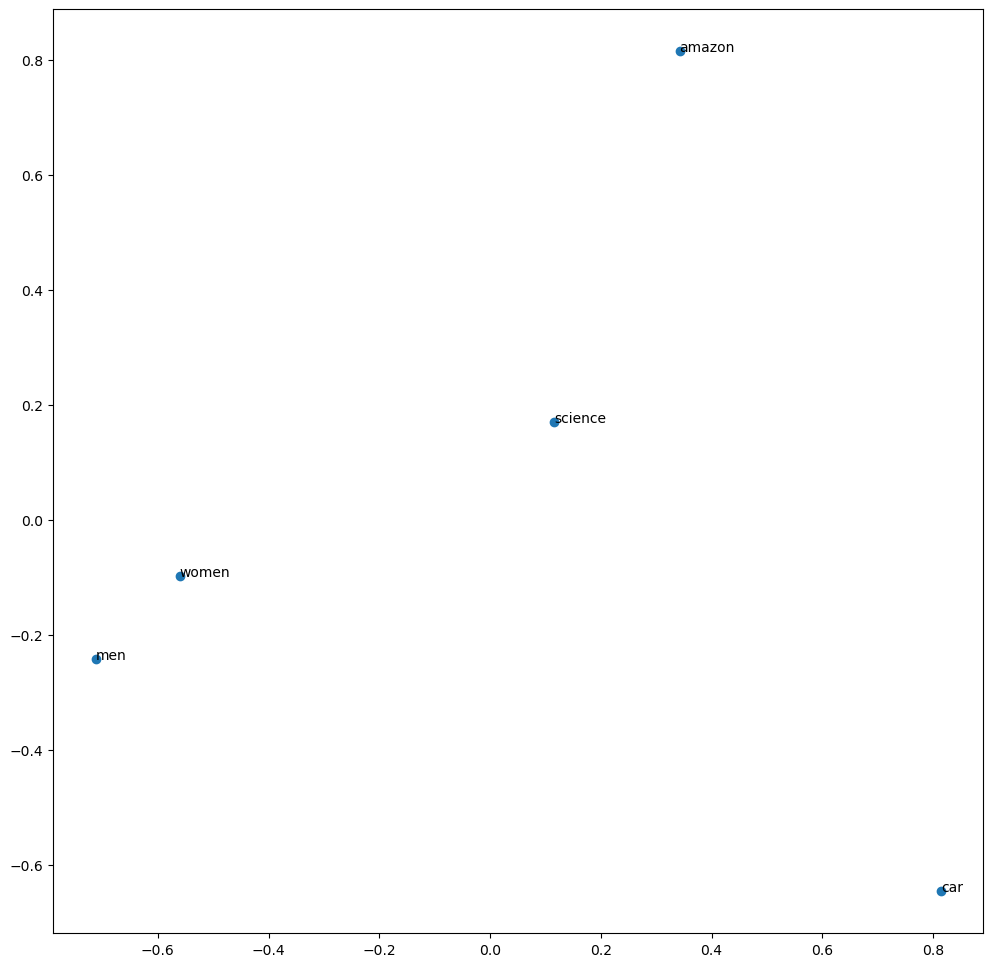

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.scatter(result[:,0],result[:,1])
for i,word in enumerate(words):
    plt.annotate(word,xy=(result[i,0],result[i,1]))
plt.show

In [146]:
def convert_vectors(text):
    vector_size=wv.vector_size
    wv_res=np.zeros(vector_size)
    ctr=1
    for w in text:
        if w in wv:
            ctr+=1
            wv_res+=wv[w]
    wv_res=wv_res/ctr
    return wv_res

In [147]:
df['word2vec']=df['tokens'].apply(convert_vectors)

In [148]:
df['word2vec'][0]

array([ 1.08201554e-02, -2.47410436e-02,  4.56728783e-02,  7.27223477e-02,
       -2.08265604e-01, -6.49811534e-03,  4.71200258e-02,  2.62188842e-01,
       -3.05653975e-02, -4.84285431e-02, -3.89509800e-02,  5.79708757e-02,
        9.32060797e-03,  1.71380330e-02,  1.84063478e-02, -7.82766520e-03,
       -1.80771556e-02, -5.20722331e-03, -8.59190691e-02, -8.66902242e-03,
       -9.36866695e-02,  2.72687358e-02,  7.13847636e-02,  2.75855110e-02,
        3.15657135e-02,  7.53042857e-02,  3.18148538e-02,  4.96500812e-02,
       -8.05673308e-02,  2.37179463e-03, -7.15397373e-02, -2.69127963e-03,
        1.82055725e-02,  1.05827727e-01, -1.16249921e-03, -1.33713085e-01,
       -1.24057877e-01,  5.09970218e-02,  3.64863747e-02,  6.70324737e-02,
        1.25760375e-02,  1.66410991e-01,  1.82325731e-02, -1.14378111e-01,
       -2.23848421e-02,  1.36013928e-02, -1.17226071e-02,  4.47386172e-02,
       -4.25711077e-02,  7.62443255e-02,  5.59370003e-02, -2.25989194e-02,
        7.44720090e-02, -

In [149]:
df

,hate_speech,lemmatized_comment,tokens,word2vec
0,1,subject regard hungarian oh boy brace lived bu...,"['subject', 'regard', 'hungarian', 'oh', 'boy'...","[0.0108201553860356, -0.024741043644564704, 0...."
1,0,iii just got work found and ground main type g...,"['iii', 'just', 'got', 'work', 'found', 'and',...","[0.014036709992367714, -0.02001582841068262, 0..."
2,0,wow guess cowboy every country,"['wow', 'guess', 'cowboy', 'every', 'country']","[0.011762197670895, -0.02504967438966729, 0.04..."
3,0,owen benjamin cowboy song go every country ama,"['owen', 'benjamin', 'cowboy', 'song', 'go', '...","[0.013797741254361777, -0.016420015664054797, ..."
4,0,all hear sun mean live small town rn for work ...,"['all', 'hear', 'sun', 'mean', 'live', 'small'...","[0.015404117882199999, -0.0259691568919354, 0...."
...,...,...,...,...
22241,1,op stop forgot post video next time hard,"['op', 'stop', 'forgot', 'post', 'video', 'nex...","[0.010492320330339974, -0.024930608079973923, ..."
22242,0,minut long video top hate champagne go need ge...,"['minut', 'long', 'video', 'top', 'hate', 'cha...","[0.010343763220589608, -0.026473635624695038, ..."
22243,1,clue whos celeb are point time need get along ...,"['clue', 'who', 's', 'celeb', 'are', 'point', ...","[0.01140631715169371, -0.024771991721006918, 0..."
22244,0,didn ’ t insult you insult me,"['didn', '’', 't', 'insult', 'you', 'insult', ...","[0.007224988961673301, -0.00753117364871761, 0..."


In [150]:
X=df['word2vec'].to_list()
Y=df['hate_speech'].to_list()

In [151]:
X[0]

array([ 1.08201554e-02, -2.47410436e-02,  4.56728783e-02,  7.27223477e-02,
       -2.08265604e-01, -6.49811534e-03,  4.71200258e-02,  2.62188842e-01,
       -3.05653975e-02, -4.84285431e-02, -3.89509800e-02,  5.79708757e-02,
        9.32060797e-03,  1.71380330e-02,  1.84063478e-02, -7.82766520e-03,
       -1.80771556e-02, -5.20722331e-03, -8.59190691e-02, -8.66902242e-03,
       -9.36866695e-02,  2.72687358e-02,  7.13847636e-02,  2.75855110e-02,
        3.15657135e-02,  7.53042857e-02,  3.18148538e-02,  4.96500812e-02,
       -8.05673308e-02,  2.37179463e-03, -7.15397373e-02, -2.69127963e-03,
        1.82055725e-02,  1.05827727e-01, -1.16249921e-03, -1.33713085e-01,
       -1.24057877e-01,  5.09970218e-02,  3.64863747e-02,  6.70324737e-02,
        1.25760375e-02,  1.66410991e-01,  1.82325731e-02, -1.14378111e-01,
       -2.23848421e-02,  1.36013928e-02, -1.17226071e-02,  4.47386172e-02,
       -4.25711077e-02,  7.62443255e-02,  5.59370003e-02, -2.25989194e-02,
        7.44720090e-02, -

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [153]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators = 100)

In [154]:
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [155]:
from sklearn import metrics
predicted=classifier.predict(X_test)
print("Logistic regression accuracy:",metrics.accuracy_score(Y_test,predicted))
print("Logistic regression Precision:",metrics.precision_score(Y_test,predicted))
print("Logistic regression Recall:",metrics.recall_score(Y_test,predicted))

Logistic regression accuracy: 0.7795505617977528
Logistic regression Precision: 0.7655172413793103
Logistic regression Recall: 0.10491493383742911


### DrawBacks:

- How to learn the representation for out-of-vocabulary words.
- How to separate some opposite word pairs. For example, “good” and “bad” are usually located very close to each other in the vector space, which may limit the performance of word vectors in NLP tasks like sentiment analysis.

# FastText

- One major draw-back for word-embedding techniques like word2vec was its inability to deal with out of corpus words.
- However fasttext follows the same skipgram and cbow (Continous Bag of Words) model like word2vec.
- Its main focus is on achieving scalable solutions for the tasks of text classification and representation while processing large datasets quickly and accurately.

In [3]:
import fasttext

In [4]:
model_en=fasttext.load_model('C:\\Users\\moham\\Downloads\\cc.en.300.bin')

In [5]:
model_en.get_nearest_neighbors("religion")

[(0.7675485610961914, 'religon'),
 (0.7604825496673584, 'relgion'),
 (0.7596755027770996, 'religions'),
 (0.7482269406318665, 'non-religion'),
 (0.7372429966926575, 'religion.'),
 (0.7269508838653564, 'religeon'),
 (0.7254904508590698, 'religion.The'),
 (0.7192957401275635, 'religion.But'),
 (0.7144022583961487, 'religion.This'),
 (0.7097055912017822, 'Religion')]

In [6]:
model_en.get_nearest_neighbors("pototoes")

[(0.7824431657791138, 'potaoes'),
 (0.7760222554206848, 'potatoes'),
 (0.7680923938751221, 'poatoes'),
 (0.767194926738739, 'potaotes'),
 (0.752520740032196, 'potatos'),
 (0.7360281348228455, 'potates'),
 (0.7069451808929443, 'potatoes-'),
 (0.6948971748352051, 'patatoes'),
 (0.6868855953216553, 'potatoes.'),
 (0.6771394610404968, 'potatoes.I')]

In [7]:
model_en.get_analogies("andhrapradesh","kerala","tamilnadu")

[(0.7055165767669678, 'Andhrapradesh'),
 (0.6141413450241089, 'anantapur'),
 (0.6135050058364868, 'karimnagar'),
 (0.6009824275970459, 'kurnool'),
 (0.5947305560112, 'AndhraPradesh'),
 (0.5908752083778381, 'belgaum'),
 (0.5809043645858765, 'vijayawada'),
 (0.5664181709289551, 'andhra'),
 (0.5659282803535461, 'gulbarga'),
 (0.5624932050704956, 'nalgonda')]

In [8]:
model_en.get_analogies("driving","car","phone")

[(0.610385537147522, 'texting'),
 (0.5203558802604675, 'phone-calling'),
 (0.5153835415840149, 'cellphone'),
 (0.5135326981544495, 'cell-phone'),
 (0.5117910504341125, 'dialing'),
 (0.5087355971336365, 'texing'),
 (0.5079342722892761, 'text-messaging'),
 (0.500900387763977, 'txting'),
 (0.4960441589355469, 'texting.'),
 (0.4951859414577484, 'Texting')]

In [9]:
model_en.get_analogies("yuvraj","india","batsmen")

[(0.6795471906661987, 'batsman'),
 (0.6490268707275391, 'bowlers'),
 (0.6478478312492371, 'Yuvraj'),
 (0.6265072226524353, 'off-spinners'),
 (0.6263039708137512, 'Rahane'),
 (0.6208177804946899, 'Shewag'),
 (0.6181459426879883, 'Bhuvi'),
 (0.6149126291275024, 'wicketkeepers'),
 (0.6145053505897522, 'tailenders'),
 (0.6118055582046509, 'leg-spinners')]

- When you train a fasttext model, it expects labels to be specified with label prefix. We will just create a third column in the dataframe that has label as well as the product description

In [ ]:
train.to_csv("train_data.csv", columns=["","hate_speech"], index=False, header=False)

In [ ]:
test.to_csv("test_data.csv", columns=["hate_speech"], index=False, header=False)

In [52]:
df['hate_speech'] = '__label__' + df['hate_speech'].astype(str)
df.head(5)

,hate_speech,lemmatized_comment,tokens
0,__label__1,subject regard hungarian oh boy brace lived bu...,"['subject', 'regard', 'hungarian', 'oh', 'boy'..."
1,__label__0,iii just got work found and ground main type g...,"['iii', 'just', 'got', 'work', 'found', 'and',..."
2,__label__0,wow guess cowboy every country,"['wow', 'guess', 'cowboy', 'every', 'country']"
3,__label__0,owen benjamin cowboy song go every country ama,"['owen', 'benjamin', 'cowboy', 'song', 'go', '..."
4,__label__0,all hear sun mean live small town rn for work ...,"['all', 'hear', 'sun', 'mean', 'live', 'small'..."


In [53]:
df['text'] = df['hate_speech'] + ' ' + df['lemmatized_comment']
df.head(3)

,hate_speech,lemmatized_comment,tokens,text
0,__label__1,subject regard hungarian oh boy brace lived bu...,"['subject', 'regard', 'hungarian', 'oh', 'boy'...",__label__1 subject regard hungarian oh boy bra...
1,__label__0,iii just got work found and ground main type g...,"['iii', 'just', 'got', 'work', 'found', 'and',...",__label__0 iii just got work found and ground ...
2,__label__0,wow guess cowboy every country,"['wow', 'guess', 'cowboy', 'every', 'country']",__label__0 wow guess cowboy every country


In [54]:
df['comment']=df['lemmatized_comment']

In [56]:
df.drop(['lemmatized_comment','tokens'],axis=1,inplace=True)

In [57]:
df

,hate_speech,text,comment
0,__label__1,__label__1 subject regard hungarian oh boy bra...,subject regard hungarian oh boy brace lived bu...
1,__label__0,__label__0 iii just got work found and ground ...,iii just got work found and ground main type g...
2,__label__0,__label__0 wow guess cowboy every country,wow guess cowboy every country
3,__label__0,__label__0 owen benjamin cowboy song go every ...,owen benjamin cowboy song go every country ama
4,__label__0,__label__0 all hear sun mean live small town r...,all hear sun mean live small town rn for work ...
...,...,...,...
22241,__label__1,__label__1 op stop forgot post video next time...,op stop forgot post video next time hard
22242,__label__0,__label__0 minut long video top hate champagne...,minut long video top hate champagne go need ge...
22243,__label__1,__label__1 clue whos celeb are point time need...,clue whos celeb are point time need get along ...
22244,__label__0,__label__0 didn ’ t insult you insult me,didn ’ t insult you insult me


In [26]:
df['hate_speech']=df['hate_speech'].replace('__label__1','1')

In [28]:
df['hate_speech']=df['hate_speech'].replace('__label__0','0')

In [78]:
df

,hate_speech,text,comment
0,__label__1,__label__1 subject regard hungarian oh boy bra...,subject regard hungarian oh boy brace lived bu...
1,__label__0,__label__0 iii just got work found and ground ...,iii just got work found and ground main type g...
2,__label__0,__label__0 wow guess cowboy every country,wow guess cowboy every country
3,__label__0,__label__0 owen benjamin cowboy song go every ...,owen benjamin cowboy song go every country ama
4,__label__0,__label__0 all hear sun mean live small town r...,all hear sun mean live small town rn for work ...
...,...,...,...
22241,__label__1,__label__1 op stop forgot post video next time...,op stop forgot post video next time hard
22242,__label__0,__label__0 minut long video top hate champagne...,minut long video top hate champagne go need ge...
22243,__label__1,__label__1 clue whos celeb are point time need...,clue whos celeb are point time need get along ...
22244,__label__0,__label__0 didn ’ t insult you insult me,didn ’ t insult you insult me


In [66]:
df.to_csv('Reddit_Final.csv',index=False)

In [67]:
data=pd.read_csv('Reddit_Final.csv')
data

,hate_speech,text,comment
0,__label__1,__label__1 subject regard hungarian oh boy bra...,subject regard hungarian oh boy brace lived bu...
1,__label__0,__label__0 iii just got work found and ground ...,iii just got work found and ground main type g...
2,__label__0,__label__0 wow guess cowboy every country,wow guess cowboy every country
3,__label__0,__label__0 owen benjamin cowboy song go every ...,owen benjamin cowboy song go every country ama
4,__label__0,__label__0 all hear sun mean live small town r...,all hear sun mean live small town rn for work ...
...,...,...,...
22241,__label__1,__label__1 op stop forgot post video next time...,op stop forgot post video next time hard
22242,__label__0,__label__0 minut long video top hate champagne...,minut long video top hate champagne go need ge...
22243,__label__1,__label__1 clue whos celeb are point time need...,clue whos celeb are point time need get along ...
22244,__label__0,__label__0 didn ’ t insult you insult me,didn ’ t insult you insult me


##### Train Test Split

In [79]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2,stratify=)

In [80]:
train.shape, test.shape

((17796, 3), (4450, 3))

In [81]:
train[['hate_speech', 'comment']].to_csv('train.txt', sep=' ', header=None, index=None)
test[['hate_speech', 'comment']].to_csv('test.txt', sep=' ', header=None, index=None)

In [82]:
import fasttext
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a FastText supervised model
model = fasttext.train_supervised(input='train.txt', epoch=10, lr=0.1, wordNgrams=2, bucket=200000, dim=100, loss='ova')

# Evaluate the model
def evaluate_model(model, test_file):
    with open(test_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    y_true = []
    y_pred = []
    for line in lines:
        label, text = line.strip().split(' ', 1)
        y_true.append(int(label.replace('__label__', '')))
        pred_label, _ = model.predict(text)
        y_pred.append(int(pred_label[0].replace('__label__', '')))

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')

# Call the evaluate_model function
evaluate_model(model, 'test.txt')

ValueError: not enough values to unpack (expected 2, got 1)

##### Train the model and evaluate performance

In [61]:
import fasttext
model = fasttext.train_supervised(input="train_data.csv")

In [62]:
model.test("test_data.csv")

(4445, 0.8591676040494938, 0.8591676040494938)

##### Now let's do prediction for few product descriptions

In [63]:
model.predict("hoe zero person will say any make sound unique saw dumb count tender day 35 thing talk profil college athlete like long areyou go ride train sweetheart cool play d3 volley state school contrato")

(('__label__0',), array([0.50281656]))

In [64]:
model.predict("general attitude women expect zero consent behave like count society wide pussy pass need verbal can acknowledge")

(('__label__1',), array([0.72180545]))

In [65]:
model.predict("all muslims are terrorists")

(('__label__0',), array([0.99881434]))

#### WordCloud

In [183]:
df=df.astype('str')

In [184]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc=WordCloud(background_color="black",
             height=800,
             width=800,
            contour_width = 2,
     contour_color = 'black').generate(''.join(df['lemmatized_comment']))


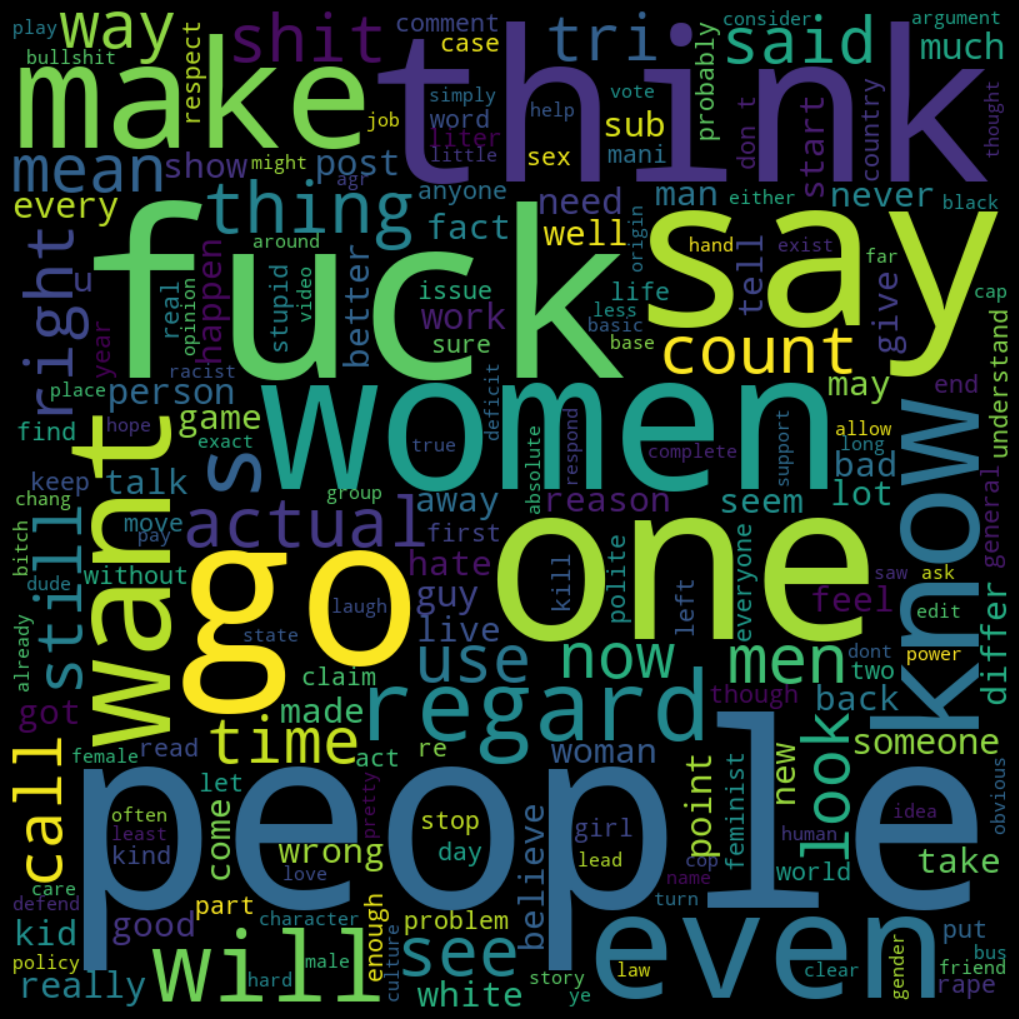

In [185]:
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [84]:
df=df.astype('str')

In [86]:
from sklearn.metrics import confusion_matrix

# predict the data
df["predicted"] = df["comment"].apply(lambda x: model.predict(x)[0][0])

# Create the confusion matrix
confusion_matrix(df["hate_speech"], df["predicted"])

array([[16623,   335],
       [  873,  4415]], dtype=int64)